In [15]:
from astropy.io import fits
from tqdm import tqdm
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm


In [45]:
# datapath = os.path.join(os.getenv("CENSAI_PATH"), "data", "hkappa158_TNG100_512")
datapath = os.path.join(os.getenv("CENSAI_PATH"), "data", "hkappa188hst_TNG100_rau2_temp")

kappa = []
kappa_id = []
kappa_var = []
alpha_var = []
headers = []
i = 0
for path in tqdm(glob.glob(os.path.join(datapath, "*.fits"))):
    file = fits.open(path)
    headers.append(file["PRIMARY"].header)
    kappa.append(file["PRIMARY"].data)
    kappa_id.append(file["PRIMARY"].header["SUBID"])
    kappa_var.append(file[1].data)
    alpha_var.append(file[2].data)
    i += 1
    if i == 36:
        break


 35%|███▌      | 35/99 [00:00<00:00, 502.13it/s]


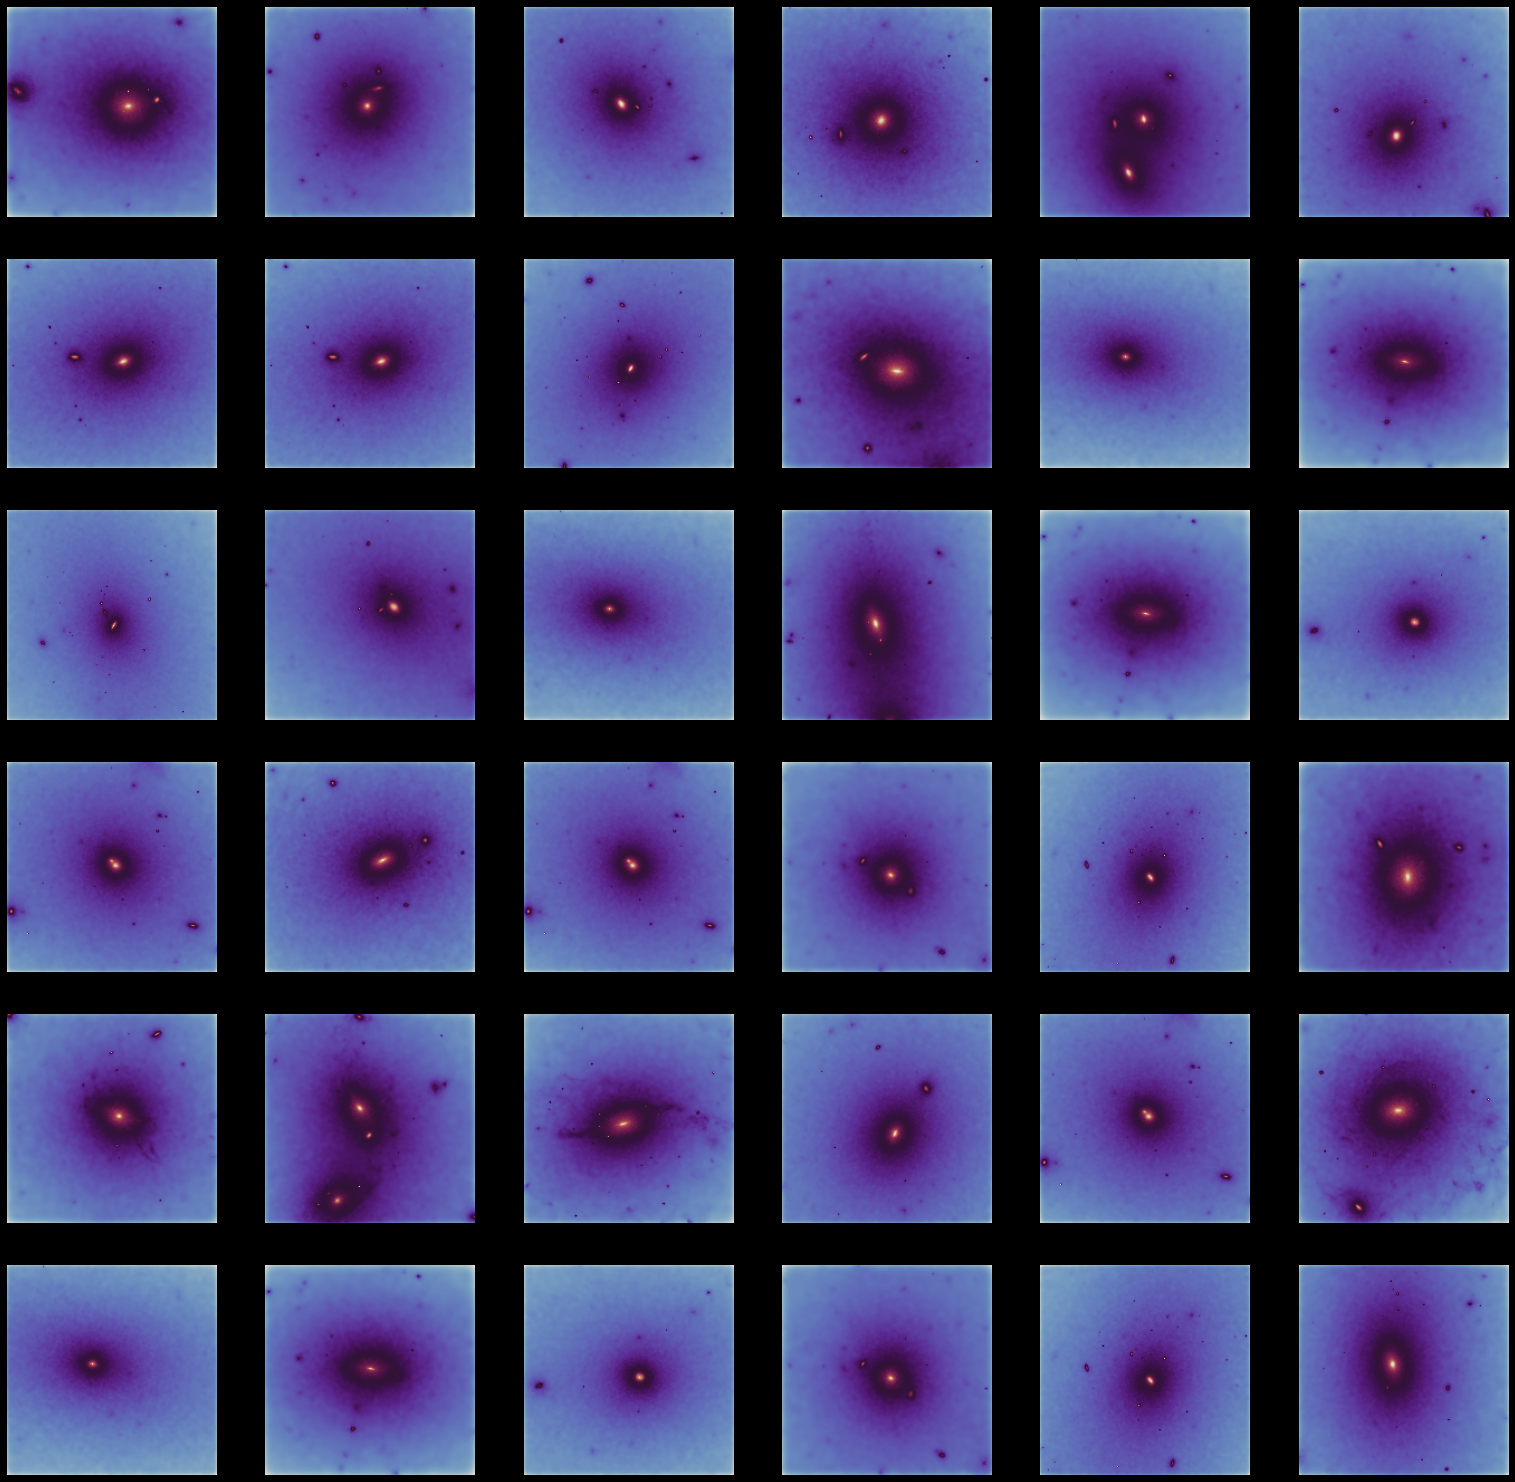

In [62]:
plt.style.use("dark_background")
fig, axs = plt.subplots(6, 6, figsize=(27, 27))
for i in range(6):
    for j in range(6):
        k = i * 6 + j
        kap = kappa[k]
        axs[i, j].imshow(np.log10(kap), cmap="twilight")
        axs[i, j].axis("off")

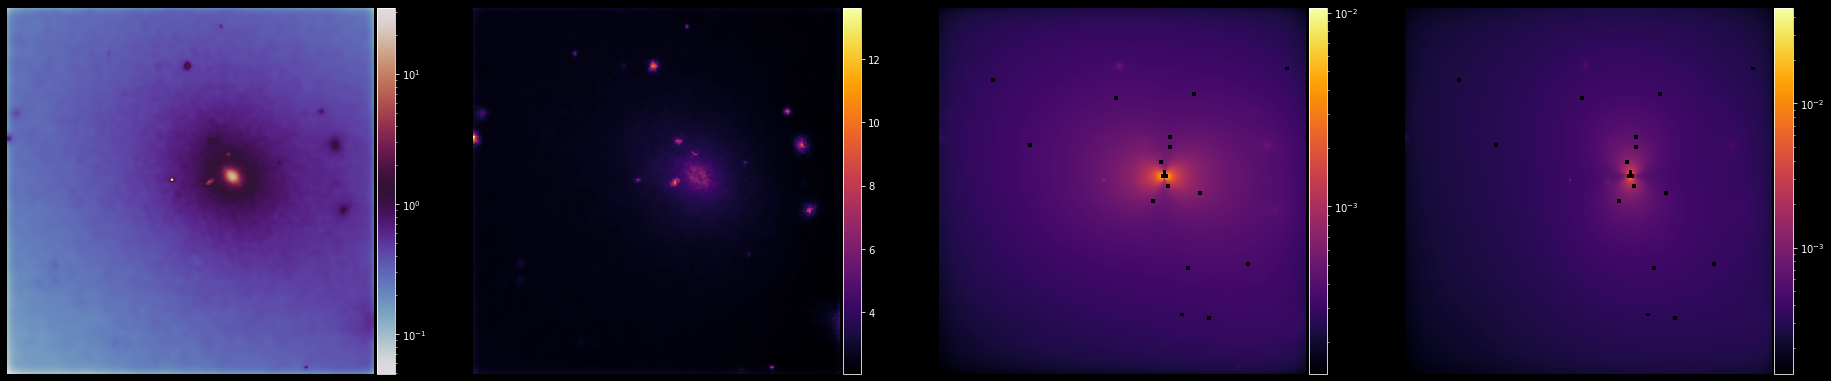

In [68]:
from astropy.cosmology import Planck18 as cosmo
alpha_transform = lambda x: x / cosmo.angular_diameter_distance(0.5).value * 3600 / np.pi * 180 * cosmo.h

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(32, 8))
k = 13
im = ax1.imshow(kappa[k], cmap="twilight", norm=LogNorm())
ax1.axis("off")
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

im = ax2.imshow(np.sqrt(kappa_var[k])/kappa[k] * 100, cmap="inferno")
ax2.axis("off")
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

im = ax3.imshow(np.sqrt(alpha_transform(alpha_var[k][..., 0])), cmap="inferno", norm=LogNorm())
ax3.axis("off")
divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

im = ax4.imshow(np.sqrt(alpha_transform(alpha_var[k][..., 1])), cmap="inferno", norm=LogNorm())
ax4.axis("off")
divider = make_axes_locatable(ax4)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [50]:
headers[k]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  188                                                  
NAXIS2  =                  188                                                  
EXTEND  =                    T                                                  
SUBID   =               128392                                                  
HALOID  =                   16                                                  
MASS    =    8357.378433645767 / Total mass in the halo, in 10^{10} solar mass u
CUTMASS =    491.6502324099532 / Total mass in the cutout in 10^{10} solar mass 
CREATED = '21-10-26_21-18-12'                                                   
OFFSET0 =            356927697                                                  
OFFSET1 =            5259317